# Forecasting

## Summary

| #   |Method Name                                              |mean squared error  |mean absolute error|
|:----|---------------------------------------------------------|-------------------:|------------------:|
| 01  | Pandas moving average - pre-grouped by month (3 month)  | 234418077.64       | 10567.13          |
| 2A  | Pandas moving average - pre-grouped by day (3 day)      | 916610.99          | 645.74            |   
| 2B  | Pandas moving average - pre-grouped by day post-grouped by month (3 day)   | 75117338.43        | 3303.45           |

## References

* https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
* https://www.kaggle.com/code/carlmcbrideellis/time-series-a-simple-moving-average-ma-model


## Loading Libraries and datasets

In [434]:
# Importing data analytics libraries
import pandas as pd
import numpy as np

In [435]:
# Importing visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Setting parameters for plot fig size
plt.rcParams["figure.figsize"] = (20,8)

In [436]:
# Importing performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
df.head()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
0,2013-01-01,0,2,991,1.0,1,2013,1,67,True
1,2013-01-01,0,2,1472,1.0,1,2013,1,23,True
2,2013-01-01,0,2,1905,1.0,1,2013,1,30,True
3,2013-01-01,0,2,2920,2.0,1,2013,1,21,True
4,2013-01-01,0,2,3320,1.0,1,2013,1,19,True


In [437]:
# Reading the cleaned and feature-engineered test dataset
df_test = pd.read_csv('../competitive-data-science-final-project/sales_test_with_target.csv')

In [438]:
# Reading the cleaned and feature-engineered train dataset
df = pd.read_csv('../competitive-data-science-final-project/new_sales_train.csv')

In [439]:
df.head()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
0,2013-01-01,0,2,991,1.0,1,2013,1,67,True
1,2013-01-01,0,2,1472,1.0,1,2013,1,23,True
2,2013-01-01,0,2,1905,1.0,1,2013,1,30,True
3,2013-01-01,0,2,2920,2.0,1,2013,1,21,True
4,2013-01-01,0,2,3320,1.0,1,2013,1,19,True


In [440]:
df.tail()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
2882303,2015-09-30,32,59,15069,1.0,9,2015,2,28,False
2882304,2015-09-30,32,59,15255,1.0,9,2015,2,63,False
2882305,2015-09-30,32,59,15256,2.0,9,2015,2,63,False
2882306,2015-09-30,32,59,16184,1.0,9,2015,2,65,False
2882307,2015-09-30,32,59,22088,1.0,9,2015,2,83,False


## Grouping the dataframes to get one row each for the measured time unit

In [441]:
# Grouping by date_block_num to get monthly item_cnt_day sum
df_monthly = df.groupby(df.date_block_num)[["item_cnt_day"]].sum()
df_monthly.tail()

,item_cnt_day
date_block_num,
28,72295.0
29,64114.0
30,63187.0
31,66079.0
32,72843.0


In [442]:
# Grouping the test data - Monthly
df_monthly_test = df_test.groupby(df_test.date_block_num)[["item_cnt_day"]].sum()

In [443]:
# Grouping by date to get daily item_cnt_day sum
df_daily = df.groupby(df.date)[["item_cnt_day"]].sum()
df_daily.tail()

,item_cnt_day
date,
2015-09-26,3075.0
2015-09-27,2818.0
2015-09-28,2275.0
2015-09-29,4209.0
2015-09-30,4068.0


In [444]:
# Grouping the test data - Daily
df_daily_test = df_test.groupby(df_test.date)[["item_cnt_day"]].sum()
df_daily_test.tail()

,item_cnt_day
date,
2015-10-27,1551.0
2015-10-28,3593.0
2015-10-29,1589.0
2015-10-30,2274.0
2015-10-31,3104.0


## **Cheking for any missing dates**

In [445]:
dates_df = df_daily.copy()

# Setting the Date values as index
#dates_df = dates_df.set_index('date')
 
# to_datetime() method converts string
# format to a DateTime object
#dates_df.index = pd.to_datetime(dates_df.index)
 
# dates which are not in the sequence
# are returned
print(pd.date_range(
  start="2013-01-01", end="2015-09-30").difference(dates_df.index))

# No missing dates

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


# 1. Pandas moving average - grouped by month - 3 month

In [446]:
# Making a copy of the data frame
df_monthly_train = df_monthly.copy()

In [447]:
# Adding rolling average column for 3 month rolling average
df_monthly_train["rolling_av3"] = df_monthly_train["item_cnt_day"].rolling(3).mean().round(2)
df_monthly_train.tail()
#mean_squared_error(df_monthly_train.item_cnt_day[2:-1], df_monthly_train.rolling_av3[2:-1])

,item_cnt_day,rolling_av3
date_block_num,,
28,72295.0,77378.67
29,64114.0,71412.00
30,63187.0,66532.00
31,66079.0,64460.00
32,72843.0,67369.67


In [448]:
# Adding the rolling average of month 32 as the actual for month 33 to predict the average for month 33 
df_monthly_train.loc[len(df_monthly_train)] = [df_monthly_train.rolling_av3[32], " "]
df_monthly_train.tail()

,item_cnt_day,rolling_av3
date_block_num,,
29,64114.00,71412.0
30,63187.00,66532.0
31,66079.00,64460.0
32,72843.00,67369.67
33,67369.67,


In [449]:
df_monthly_train.head()

,item_cnt_day,rolling_av3
date_block_num,,
0,131478.0,NaN
1,128090.0,NaN
2,147142.0,135570.0
3,107190.0,127474.0
4,106970.0,120434.0


In [450]:
# Predicting the rolling average for month 33 in a seperate column
df_monthly_train["rolling_av3_1"] = df_monthly_train["item_cnt_day"].rolling(3).mean().round(2)
df_monthly_train.tail()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
29,64114.00,71412.0,71412.00
30,63187.00,66532.0,66532.00
31,66079.00,64460.0,64460.00
32,72843.00,67369.67,67369.67
33,67369.67,,68763.89


In [451]:
df_monthly_train.head()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
0,131478.0,NaN,NaN
1,128090.0,NaN,NaN
2,147142.0,135570.0,135570.0
3,107190.0,127474.0,127474.0
4,106970.0,120434.0,120434.0


In [452]:
# Replacing the item_cnt_day value for month 33 with test data and calculating the MSE and MAE
actual_val = float(df_monthly_test.item_cnt_day.iloc[0])
#df.at['C', 'x'] = 10
df_monthly_train.at[33,"item_cnt_day"] = actual_val
df_monthly_train.tail()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
29,64114.0,71412.0,71412.00
30,63187.0,66532.0,66532.00
31,66079.0,64460.0,64460.00
32,72843.0,67369.67,67369.67
33,71056.0,,68763.89


In [453]:
df_monthly_train.head()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
0,131478.0,NaN,NaN
1,128090.0,NaN,NaN
2,147142.0,135570.0,135570.0
3,107190.0,127474.0,127474.0
4,106970.0,120434.0,120434.0


In [480]:
#mean squared error (y_true, y_pred)
mean_squared_error(df_monthly_train.item_cnt_day[2:], df_monthly_train.rolling_av3_1[2:])


234418077.64107814

In [481]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(df_monthly_train.item_cnt_day[2:], df_monthly_train.rolling_av3_1[2:])


10567.1390625

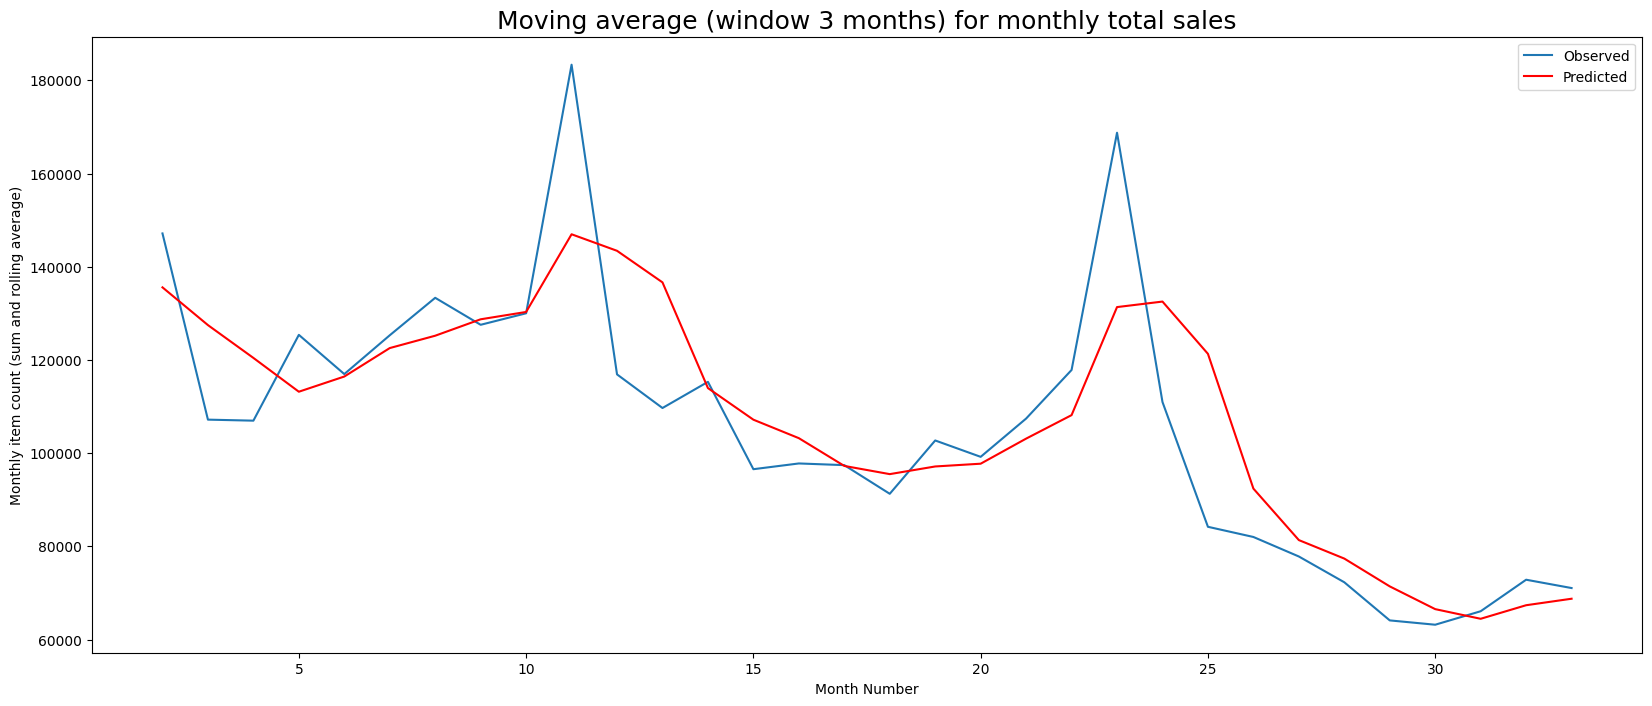

In [456]:
plt.plot(df_monthly_train.item_cnt_day[2:])
plt.plot(df_monthly_train.rolling_av3_1[2:], color='red')
plt.title("Moving average (window 3 months) for monthly total sales",
         fontsize = 18)
plt.xlabel("Month Number")
plt.ylabel("Monthly item count (sum and rolling average)")
plt.legend(["Observed", "Predicted"])
plt.show()

# 2A. Pandas moving average - daily - 3 day

In [457]:
# Making a copy of the data frame
df_daily_train = df_daily.copy()
df_daily_train.tail()

,item_cnt_day
date,
2015-09-26,3075.0
2015-09-27,2818.0
2015-09-28,2275.0
2015-09-29,4209.0
2015-09-30,4068.0


In [458]:
# Adding rolling average column for 3 day rolling average
df_daily_train["rolling_av3"] = df_daily_train["item_cnt_day"].rolling(3).mean().round(2)
df_daily_train.tail()

,item_cnt_day,rolling_av3
date,,
2015-09-26,3075.0,2452.67
2015-09-27,2818.0,2736.67
2015-09-28,2275.0,2722.67
2015-09-29,4209.0,3100.67
2015-09-30,4068.0,3517.33


In [459]:
length = len(df_daily_train)
length

1003

In [460]:
#df_daily_train.item_cnt_day[length-1]

In [461]:
# Adding the rolling average of month 32 as the actual for month 33 to predict the average for month 33 
#df_monthly_train.loc[len(df_monthly_train)] = [df_monthly_train.rolling_av3[32], " "]
#df_monthly_train.tail()

In [462]:
d = 1002
i = 0
while (d < 1033):
    df_daily_train["rolling_av3"] = df_daily_train["item_cnt_day"].rolling(3).mean().round(2)
    #df.at[4, 'B']
    df_daily_train.at[df_daily_test.index[i], "item_cnt_day"] = df_daily_train.rolling_av3[len(df_daily_train) - 1]
    d = d + 1
    i = i + 1
    #len(df_daily_train)
    #
df_daily_train["rolling_av3"] = df_daily_train["item_cnt_day"].rolling(3).mean().round(2)
print('Rolling average calculated')
# replace test data range of item_cnt_day with actual values
i = 0
while (i < len(df_daily_test)):
    df_daily_train.item_cnt_day[length + i] = df_daily_test.item_cnt_day[i]
    i = i + 1
print("item_cnt_day replaced by original values")

Rolling average calculated
item_cnt_day replaced by original values


In [463]:
#df_daily_train.head()

In [464]:
#df_daily_train.tail(33)

In [465]:
#mean squared error (y_true, y_pred)
mean_squared_error(df_daily_train.item_cnt_day[2:], df_daily_train.rolling_av3[2:])

916610.9981930233

In [466]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(df_daily_train.item_cnt_day[2:], df_daily_train.rolling_av3[2:])

645.7462209302325

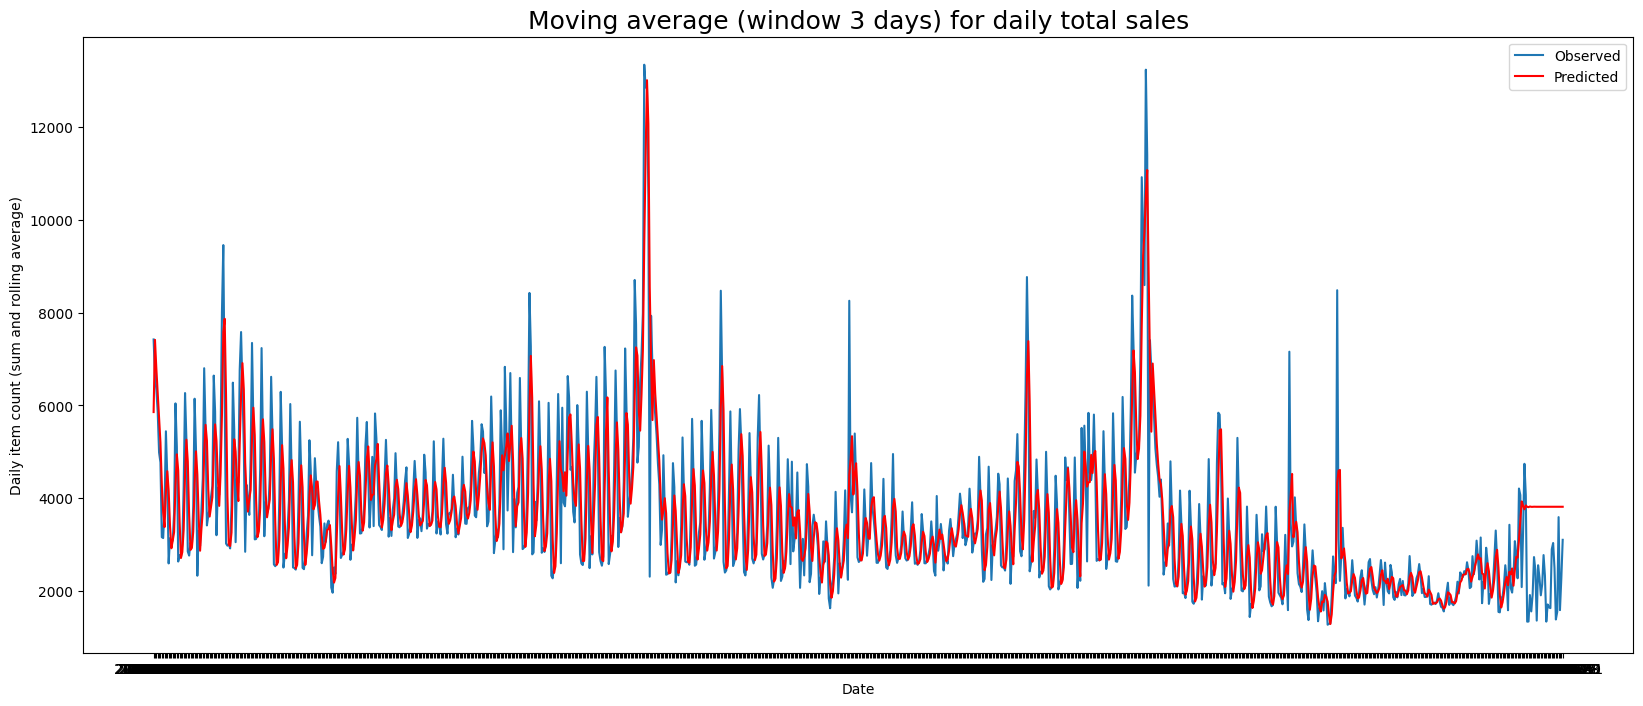

In [467]:
plt.plot(df_daily_train.item_cnt_day[2:])
plt.plot(df_daily_train.rolling_av3[2:], color='red')
plt.title("Moving average (window 3 days) for daily total sales",
         fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Daily item count (sum and rolling average)")
plt.legend(["Observed", "Predicted"])
plt.show()

# 2B. Pandas moving average - daily - 3 day (Grouped by Month)

In [468]:
# Grouping the results by month
df_daily_train.head()
temp_monthly = df_daily_train.reset_index()
temp_monthly

,date,item_cnt_day,rolling_av3
0,2013-01-01,1951.0,NaN
1,2013-01-02,8198.0,NaN
2,2013-01-03,7422.0,5857.00
3,2013-01-04,6617.0,7412.33
4,2013-01-05,6345.0,6794.67
...,...,...,...
1029,2015-10-27,1551.0,3816.17
1030,2015-10-28,3593.0,3816.17
1031,2015-10-29,1589.0,3816.17
1032,2015-10-30,2274.0,3816.17


In [469]:
type(temp_monthly.date[0])
temp_monthly['date']= pd.to_datetime(temp_monthly['date'])

In [470]:
temp_monthly.head()

,date,item_cnt_day,rolling_av3
0,2013-01-01,1951.0,NaN
1,2013-01-02,8198.0,NaN
2,2013-01-03,7422.0,5857.00
3,2013-01-04,6617.0,7412.33
4,2013-01-05,6345.0,6794.67


In [471]:
temp_monthly.index = temp_monthly['date']
temp_monthly = temp_monthly.groupby(pd.Grouper(freq='M'))[["item_cnt_day", "rolling_av3"]].sum()

In [472]:
temp_monthly

,item_cnt_day,rolling_av3
date,,
2013-01-31,131478.0,124440.00
2013-02-28,128090.0,128143.99
2013-03-31,147142.0,144307.70
2013-04-30,107190.0,109441.99
2013-05-31,106970.0,106585.30
2013-06-30,125381.0,124823.64
2013-07-31,116966.0,117998.67
2013-08-31,125291.0,123390.64
2013-09-30,133332.0,135052.01


In [473]:
#mean squared error (y_true, y_pred)
mean_squared_error(temp_monthly.item_cnt_day, temp_monthly.rolling_av3)

75117338.43258236

In [474]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(temp_monthly.item_cnt_day, temp_monthly.rolling_av3)

3303.458235294118

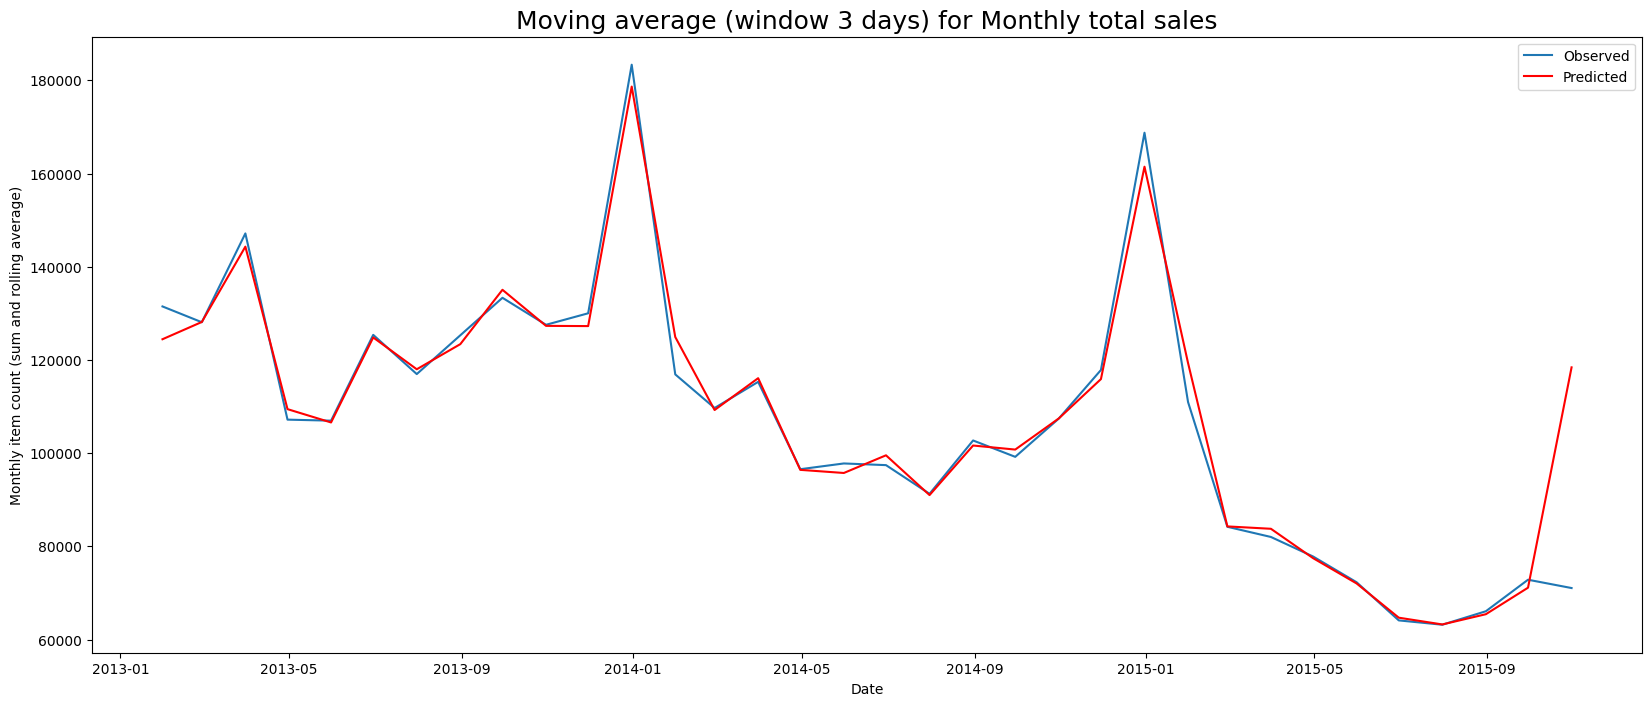

In [475]:
plt.plot(temp_monthly.item_cnt_day)
plt.plot(temp_monthly.rolling_av3, color='red')
plt.title("Moving average (window 3 days) for Monthly total sales",
         fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Monthly item count (sum and rolling average)")
plt.legend(["Observed", "Predicted"])
plt.show()

# 3. ARIMA

Reference: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

AR - Autoregression: uses the dependent relationship between an observation and some number of lagged observations.

I  - Integrated: The use of differencing of raw observations in order to make the time series stationary

MA - Moving Average: uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


**The parameters of the ARIMA**


p: lag order - The number of lag observations included in the model.

d: degree of differencing - The number of times that the raw observations are differenced.

q: order of moving average - The size of the moving average window.

In [566]:
df_for_arima = df_daily.copy().reset_index()

In [567]:
df_for_arima.tail()

,date,item_cnt_day
998,2015-09-26,3075.0
999,2015-09-27,2818.0
1000,2015-09-28,2275.0
1001,2015-09-29,4209.0
1002,2015-09-30,4068.0


In [568]:
df_for_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1003 non-null   object 
 1   item_cnt_day  1003 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [569]:
df_for_arima.date = pd.to_datetime(df_for_arima.date)
df_for_arima = df_for_arima.resample(rule='M', on='date')['item_cnt_day'].sum()
df_for_arima.head()

date
2013-01-31    131478.0
2013-02-28    128090.0
2013-03-31    147142.0
2013-04-30    107190.0
2013-05-31    106970.0
Freq: M, Name: item_cnt_day, dtype: float64

In [570]:
df_for_arima.head()

date
2013-01-31    131478.0
2013-02-28    128090.0
2013-03-31    147142.0
2013-04-30    107190.0
2013-05-31    106970.0
Freq: M, Name: item_cnt_day, dtype: float64

Text(0, 0.5, 'Total item count of the month')

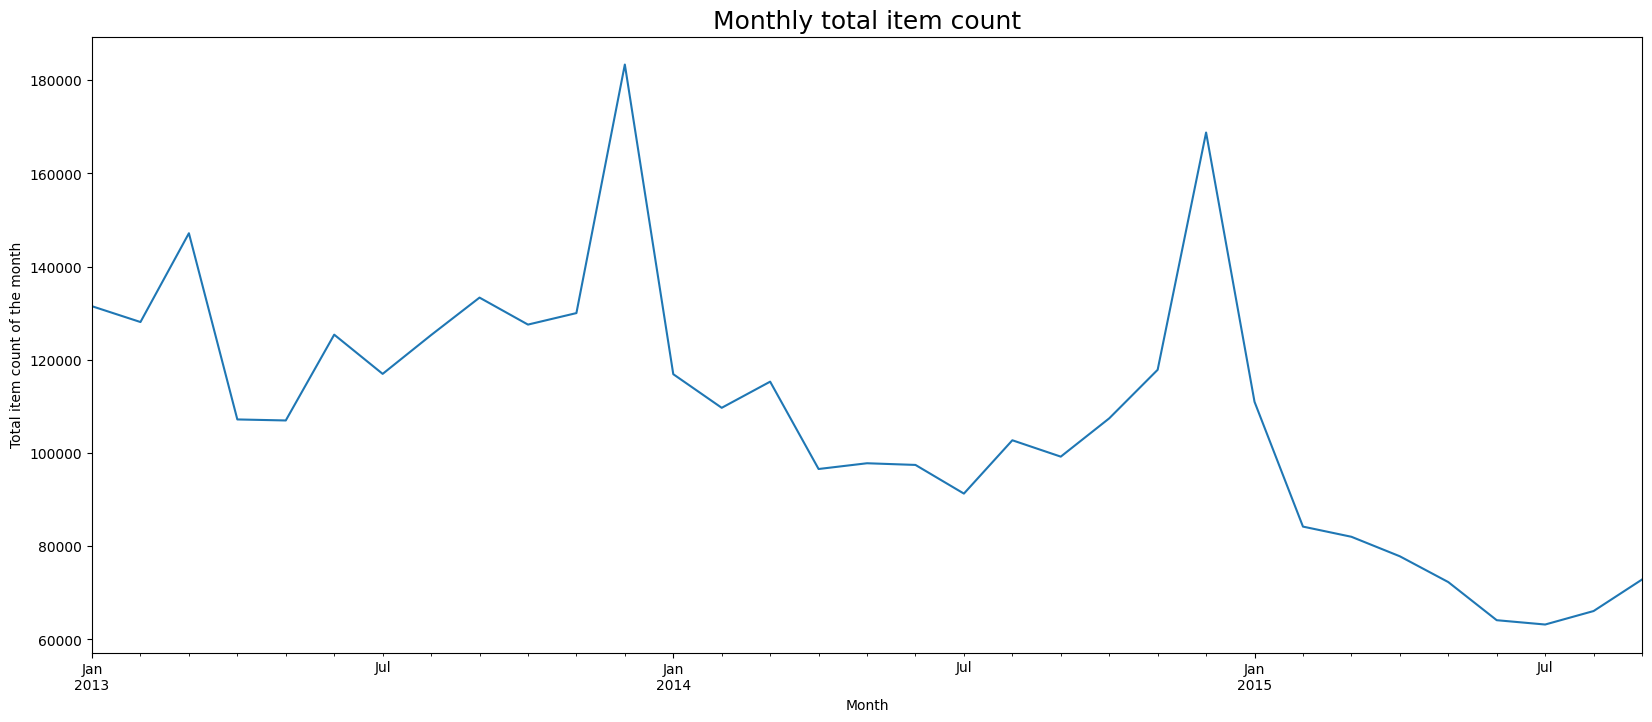

In [571]:
df_for_arima.plot()
plt.title("Monthly total item count",
         fontsize = 18)
plt.xlabel("Month")
plt.ylabel("Total item count of the month")

In [564]:
from pandas.plotting import autocorrelation_plot

Text(0.5, 1.0, 'Autocorrelation plot for Monthly item counts time series')

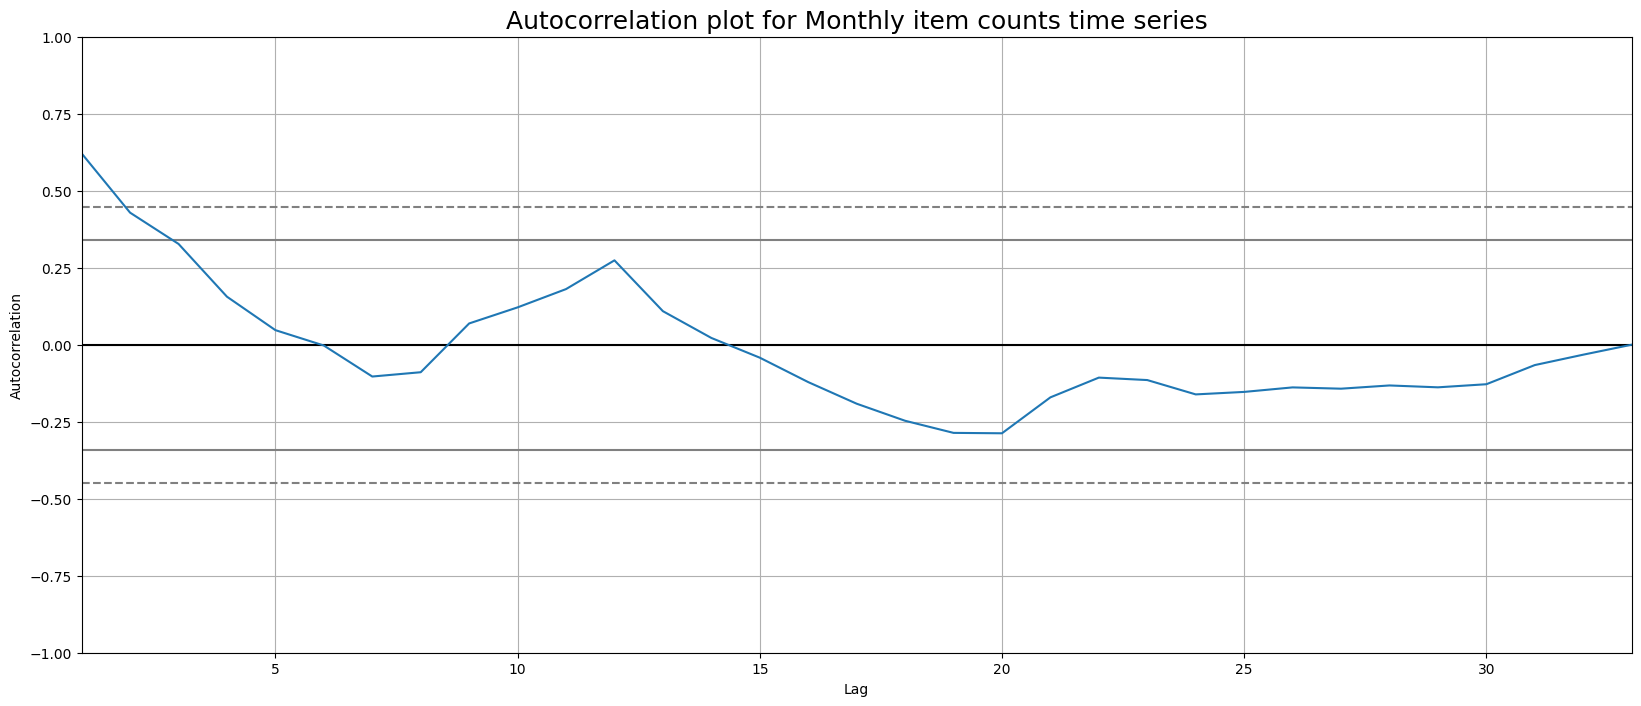

In [573]:
# Looking at the autocorrelation plot of the time series
autocorrelation_plot(df_for_arima)
plt.title("Autocorrelation plot for Monthly item counts time series",
         fontsize = 18)